In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1st TASK (Regression)

In [662]:
df = pd.read_csv('weight-height.csv')

In [663]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [664]:
df.shape

(8555, 3)

In [665]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [667]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [668]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [669]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [670]:
df.Gender = le.fit_transform(df.Gender)

In [671]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [672]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [673]:
df['Height'] = scaler.fit_transform(df[['Height']])

In [674]:
df.head()

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801


In [675]:
df['Weight'] = scaler.fit_transform(df[['Weight']])

In [676]:
df.head()

,Gender,Height,Weight
0,1,1.827233,2.380023
1,1,0.512039,-0.103684
2,1,1.895545,1.470197
3,1,1.277788,1.698073
4,1,0.797634,1.270738


In [677]:
x = df.drop('Weight', axis =1)

In [678]:
x.head()

,Gender,Height
0,1,1.827233
1,1,0.512039
2,1,1.895545
3,1,1.277788
4,1,0.797634


In [679]:
y = df[['Weight']]

In [680]:
y.head()

,Weight
0,2.380023
1,-0.103684
2,1.470197
3,1.698073
4,1.270738


In [681]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [682]:
xtrain, xtest, ytrain, ytext = tts(x,y,test_size = .30,random_state = 1)

In [683]:
xtrain.head()

,Gender,Height
1277,1,1.447687
5361,0,-1.518938
5728,0,0.599644
4276,1,0.379392
3112,1,-0.472192


In [684]:
xtrain.shape

(5988, 2)

In [685]:
xtest.shape

(2567, 2)

# Linear Regression

In [686]:
reg = LinearRegression().fit(xtrain, ytrain)

In [687]:
reg.coef_

array([[0.60369401, 0.71741679]])

In [688]:
reg.intercept_

array([-0.35595394])

In [689]:
predct = reg.predict(xtest)

In [690]:
predct

array([[-0.68043716],
       [ 0.99561187],
       [ 0.59304621],
       ...,
       [-0.15370062],
       [ 0.66149925],
       [ 1.11696722]])

In [691]:
df['predicted_result'] = reg.predict(x)

In [692]:
df.tail(10)

,Gender,Height,Weight,predicted_result
8545,0,-0.494707,-0.482541,-0.710865
8546,0,0.205744,-0.414072,-0.208349
8547,0,-1.959239,-1.505492,-1.761545
8548,0,-1.193126,-1.032317,-1.211923
8549,0,-1.337157,-1.393201,-1.315253
8550,0,-1.642587,-1.718593,-1.534373
8551,0,-0.879344,-1.114506,-0.986810
8552,0,-0.318306,-0.302417,-0.584312
8553,0,0.161000,-0.435501,-0.240450
8554,0,-1.528897,-1.072934,-1.452811


In [693]:
df.head()

,Gender,Height,Weight,predicted_result
0,1,1.827233,2.380023,1.558627
1,1,0.512039,-0.103684,0.615085
2,1,1.895545,1.470197,1.607636
3,1,1.277788,1.698073,1.164446
4,1,0.797634,1.270738,0.819976


In [694]:
reg.predict([[0,0.161000]])

array([[-0.24044984]])

In [695]:
reg.predict([[1,1.277788]])

array([[1.16444663]])

In [696]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [697]:
mse= mean_squared_error(ytext,predct)
accuracy = r2_score(ytext, predct)
mae= mean_absolute_error(ytext, predct)

In [698]:
mse

0.09708113053084728

In [699]:
r2

0.905995960709116

In [700]:
mae

0.24911429687296716

# KNN Regressor

In [701]:
from sklearn.neighbors import KNeighborsRegressor

In [702]:
neigh = KNeighborsRegressor(n_neighbors=5)

In [703]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [704]:
K_predct = neigh.predict(xtest)

In [705]:
K_predct

array([[-0.48238561],
       [ 0.99338323],
       [ 0.41827163],
       ...,
       [-0.16760663],
       [ 0.46881764],
       [ 1.09018559]])

In [706]:
neigh.predict([[0,0.161000]])


array([[-0.1262495]])

In [707]:
neigh.predict([[1,1.277788]])

array([[1.05220251]])

In [708]:
mse1= mean_squared_error(ytext,K_predct)
accuracy1 = r2_score(ytext, K_predct)
mae1= mean_absolute_error(ytext, K_predct)

In [709]:
mse1

0.11995179424647479

In [710]:
accuracy1

0.8838502073708883

In [711]:
mae1

0.27622290056368154

# 2nd TASK(Classification)

In [712]:
df1 = pd.read_csv("Breast Cancer.csv")

In [713]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [714]:
df1.shape

(569, 33)

In [715]:
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [716]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [717]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [718]:
df1.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [719]:
df1 = df1.drop('id',axis =1)

In [720]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [721]:
df1.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,NaN


In [722]:
df1 = df1.drop('Unnamed: 32', axis =1)

In [723]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:title={'center':'Correlation for Every Column'}>

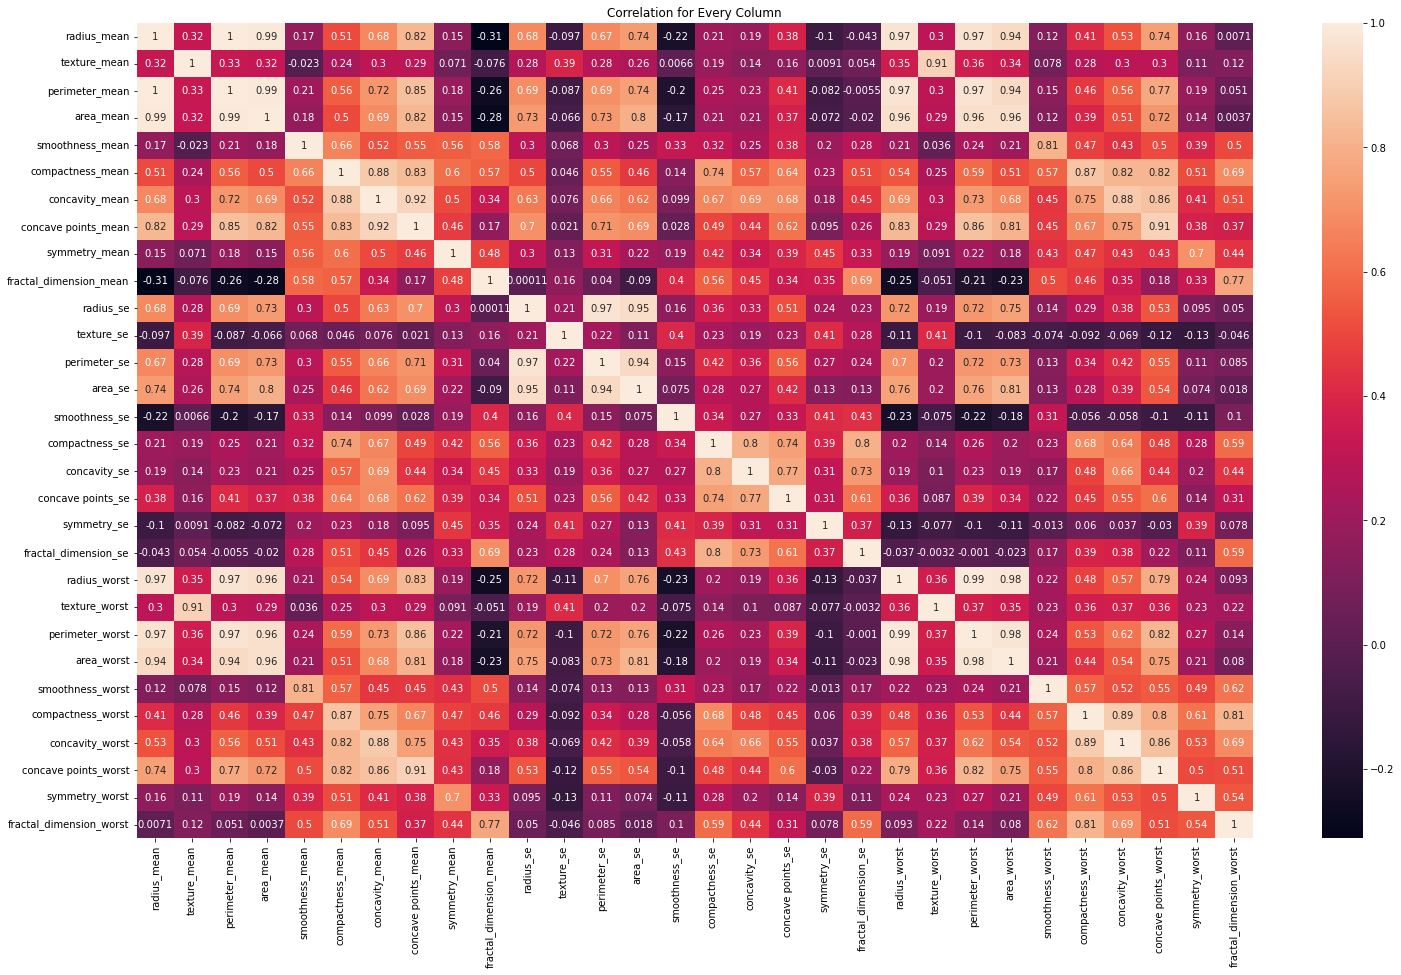

In [724]:
plt.figure(figsize= (25,15))
plt.title('Correlation for Every Column')
sns.heatmap(df1.corr(),annot= True)

In [725]:
x1= df1.drop('diagnosis', axis =1)

In [726]:
x1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [727]:
y1 = df1[['diagnosis']]

In [728]:
y1.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [729]:
x1train, x1test, y1train, y1test = tts(x1,y1,test_size=.30,random_state = 1)

In [730]:
x1train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.15820,0.180400,0.09608,0.2664,0.07809
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.251200,0.13390,0.2534,0.07858
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.16320,0.162200,0.07393,0.2781,0.08052
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.1415,0.21700,0.230200,0.11050,0.2787,0.07427


In [731]:
x1train.shape

(398, 30)

In [732]:
x1test.shape

(171, 30)

In [733]:
##Decision Tree Classifier##

In [734]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [735]:
clf = DecisionTreeClassifier()

In [736]:
clf.fit(x1train,y1train)

DecisionTreeClassifier()

In [737]:
pred1 = clf.predict(x1test)

In [738]:
pred1

array(['M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [739]:
y1test

,diagnosis
421,B
47,M
292,B
186,M
414,M
...,...
6,M
487,M
11,M
268,B


In [740]:
np.array(y1test)

array([['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
      

In [741]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [742]:
print(classification_report(y1test, pred1))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94       108
           M       0.95      0.83      0.88        63

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



In [743]:
cm = confusion_matrix(y1test, pred1)

In [744]:
cm

array([[105,   3],
       [ 11,  52]], dtype=int64)

Text(0.5, 1.0, 'Confusin Matrix for Decision Tree Classifier')

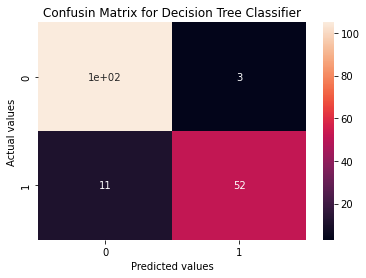

In [745]:
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusin Matrix for Decision Tree Classifier')

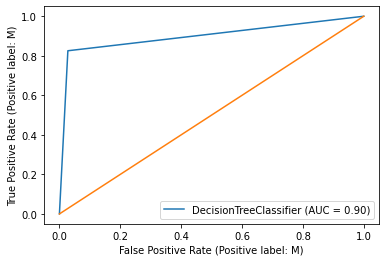

In [746]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, x1test, y1test)
plt.plot([0,1],[0,1])


In [747]:
#Knn Classification ##

In [748]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=5)

In [749]:
neigh1.fit(x1train,y1train)


KNeighborsClassifier()

In [750]:
pred2 = clf.predict(x1test)

In [751]:
pred2

array(['M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [752]:
y1test

,diagnosis
421,B
47,M
292,B
186,M
414,M
...,...
6,M
487,M
11,M
268,B


In [753]:
print(classification_report(y1test, pred2))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94       108
           M       0.95      0.83      0.88        63

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



In [754]:
cm = confusion_matrix(y1test, pred1)

In [755]:
cm

array([[105,   3],
       [ 11,  52]], dtype=int64)

Text(0.5, 1.0, 'Confusin Matrix for Knn Classifier')

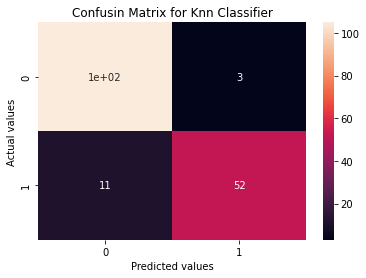

In [756]:
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusin Matrix for Knn Classifier')

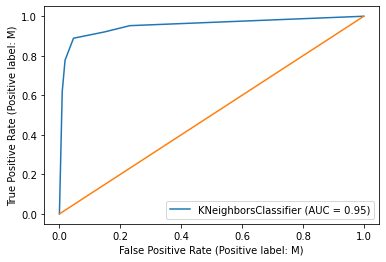

In [757]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(neigh1, x1test, y1test)
plt.plot([0,1],[0,1])
